In [ ]:
import os
import tarfile
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sys
import pandas as pd

%matplotlib inline

In [2]:
# DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
# HOUSING_PATH = os.path.join("datasets", "housing")
# HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
#     if not os.path.isdir(housing_path):
#         os.makedirs(housing_path)
#     tgz_path = os.path.join(housing_path, "housing.tgz")
#     urllib.request.urlretrieve(housing_url, tgz_path)
#     housing_tgz = tarfile.open(tgz_path)
#     housing_tgz.extractall(path=housing_path)
#     housing_tgz.close()
# fetch_housing_data()

In [3]:
housing = pd.read_csv('./datasets/housing/housing.csv')

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


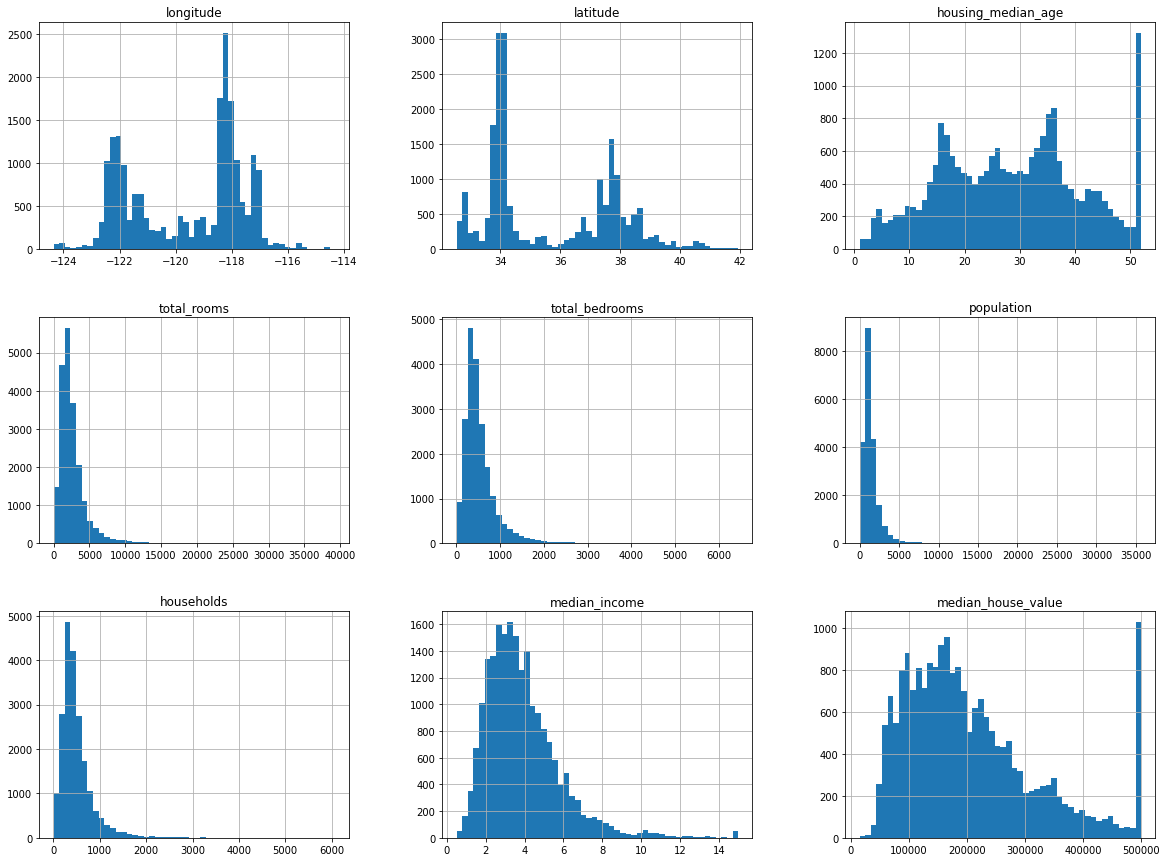

In [8]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(housing, test_size=0.2, random_state=42)

In [10]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [11]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

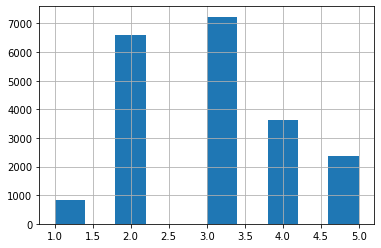

In [12]:
housing["income_cat"].hist()

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [15]:
housing = strat_train_set.drop("median_house_value", axis=1) # 훈련 세트를 위해 레이블 삭제
housing_labels = strat_train_set["median_house_value"].copy()

In [16]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median") #결측치 중앙값 대체

In [18]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [19]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [20]:
X = imputer.transform(housing_num)

In [21]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [22]:
housing_ocean = housing[["ocean_proximity"]]

In [23]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
housing_one_hot = one_hot_encoder.fit_transform(housing_ocean)
housing_one_hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [24]:
one_hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin

# 열 인덱스
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # *args 또는 **kargs 없음
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # 아무것도 하지 않습니다
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.to_numpy())

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [31]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

## 1. SVR 하이퍼 파라미터 조정

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR


param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   4.9s
[CV] END ..............................C=10.0, kernel=linear; total time=   4.9s
[CV] END ..............................C=10.0, kernel=linear; total time=   4.8s
[CV] END ..............................C=10.0, kernel=linear; total time=   4.8s
[CV] END ..............................C=10.0, kernel=linear; total time=   4.9s
[CV] END ..............................C=30.0, kernel=linear; total time=   4.8s
[CV] END ..............................C=30.0, kernel=linear; total time=   5.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   5.2s
[CV] END ..............................C=30.0, kernel=linear; total time=   5.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   5.0s
[CV] END .............................C=100.0, kernel=linear; total time=   5.0s
[CV] END .............................C=100.0, 

[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=   9.3s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=   9.4s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=   9.3s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=   9.3s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=   9.3s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=   9.3s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=   9.3s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=   9.3s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=   9.3s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=   9.2s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=   9.0s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=   8.9s
[CV] END ...................

[CV] END .....................C=300.0, gamma=0.1, kernel=rbf; total time=   8.7s
[CV] END .....................C=300.0, gamma=0.1, kernel=rbf; total time=   8.8s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=   8.6s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=   8.4s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=   8.4s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=   8.4s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=   8.4s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=   8.3s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=   8.3s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=   8.3s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=   8.3s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=   8.3s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [33]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

70363.8400565315

In [34]:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

## 2. GridSearchCV를 RandomizedSearchCV로 바꿔보라.

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# expon(), reciprocal()와 그외 다른 확률 분포 함수에 대해서는
# https://docs.scipy.org/doc/scipy/reference/stats.html를 참고하세요.

# 노트: kernel 매개변수가 "linear"일 때는 gamma가 무시됩니다.
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.1s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.1s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.1s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.1s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.1s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  10.0s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  10.2s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  10.1s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  10.2s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  10.4s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, 

[CV] END C=8935.505635947808, gamma=0.37354658165762367, kernel=rbf; total time=   8.4s
[CV] END C=8935.505635947808, gamma=0.37354658165762367, kernel=rbf; total time=   8.4s
[CV] END C=8935.505635947808, gamma=0.37354658165762367, kernel=rbf; total time=   8.4s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   5.0s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   5.1s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   5.1s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   5.1s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   5.0s
[CV] END C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf; total time= 1.9min
[CV] END C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf; total time= 1.4min
[CV] END C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf; total time= 1.3min
[CV] END C=151136.2028

[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   8.4s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   8.4s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   8.5s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   8.4s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   8.5s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   5.3s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   5.3s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   5.4s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   5.3s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   5.2s
[CV] END C=55.53838911232773, gamma=0.578634378499143, kernel=linear; total time=   5.0s
[CV] END C=55.5383891

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f19a84d9358>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f19a84d9048>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [36]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

54767.960710084124

In [37]:
rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

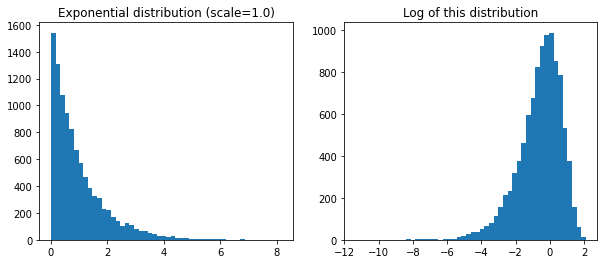

In [38]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

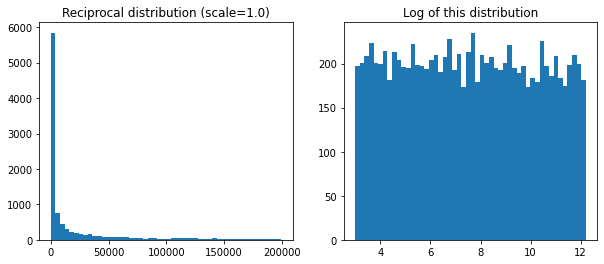

In [39]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

## 3. 가장 중요한 특성을 선택하는 변환기를 준비 파이프라인에 추가하라.

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [46]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

AttributeError: 'SVR' object has no attribute 'feature_importances_'

In [42]:
k = 5

top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

NameError: name 'feature_importances' is not defined

In [ ]:
np.array(attributes)[top_k_feature_indices]

In [ ]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

In [ ]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [ ]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)
housing_prepared_top_k_features[0:3]

In [ ]:
housing_prepared[0:3, top_k_feature_indices]

## 4. 전체 데이터 준비 과정과 최종 예측을 하나의 파이프라인으로 만들어라

In [ ]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [ ]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)₩

In [ ]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

## GridSearchCV를 이용해 준비단계의 옵션을 자동으로 탐색해 보아라

In [ ]:
param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(housing, housing_labels)

In [ ]:
grid_search_prep.best_params_